Team Wano:

1. Bigyan Lamichhane C0882519
2. Shanoverali Munavverali Saiyed C0882380
3. Sunil Rai C0882530
4. Ujjawal Poudel C0886018


W24-AML3304 S2:
Assignment: The Embedding

In [96]:
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install nltk
!pip install wordcloud

In [97]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM

In [98]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
# Checking for GPU availability
torch.cuda.is_available()

# Mounting Google drive to load files.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Choosen Rotten tomatoes review dataset.
# https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv

# Data columns (total 22 columns):
#  #   Column                            Non-Null Count  Dtype
# ---  ------                            --------------  -----
#  0   rotten_tomatoes_link              17712 non-null  object
#  1   movie_title                       17712 non-null  object
#  2   movie_info                        17391 non-null  object
#  3   critics_consensus                 9134 non-null   object
#  4   content_rating                    17712 non-null  object
#  5   genres                            17693 non-null  object
#  6   directors                         17518 non-null  object
#  7   authors                           16170 non-null  object
#  8   actors                            17360 non-null  object
#  9   original_release_date             16546 non-null  object
#  10  streaming_release_date            17328 non-null  object
#  11  runtime                           17398 non-null  float64
#  12  production_company                17213 non-null  object
#  13  tomatometer_status                17668 non-null  object
#  14  tomatometer_rating                17668 non-null  float64
#  15  tomatometer_count                 17668 non-null  float64
#  16  audience_status                   17264 non-null  object
#  17  audience_rating                   17416 non-null  float64
#  18  audience_count                    17415 non-null  float64
#  19  tomatometer_top_critics_count     17712 non-null  int64
#  20  tomatometer_fresh_critics_count   17712 non-null  int64
#  21  tomatometer_rotten_critics_count  17712 non-null  int64

In [101]:
rtreviewdf = pd.read_csv("/content/drive/MyDrive/rotten_tomatoes_movies.csv")

In [102]:
rtreviewdf.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [103]:
rtreviewdf.tail()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


In [104]:
rtreviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [105]:
rtreviewdf.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [106]:
rtreviewdf.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [107]:
rtreviewdf.shape

(17712, 22)

In [108]:
rtreviewdf.dropna(inplace=True)

In [109]:
rtreviewdf.isnull().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64

In [110]:
rtreviewdf.shape

(8077, 22)

In [111]:
rtreviewdf.duplicated().sum()

0

In [112]:
text_columns = ['movie_info', 'critics_consensus', 'genres', 'directors', 'authors', 'actors']

In [113]:
# Concatenate the textual features into a single text column
rtreviewdf['combined_text'] = rtreviewdf[text_columns].agg(' '.join, axis=1)

In [114]:
def preprocesstext(newstitle):
  # Tokenizing the text.
  tokenized_newstitle = word_tokenize(newstitle)

  # Lowercasing the text
  lowercase_token = [newstitle.lower() for newstitle in tokenized_newstitle]

  # Removing special characters, digit, punctuation using regular expressions.
  regex = "[^a-zA-Z0-9\s]"
  clean_text_token = [re.sub(regex, "", token) for token in lowercase_token]

  # Removing the stopwords
  stop_words = set(stopwords.words("english"))
  filtered_clean_tokens = [word for word in clean_text_token if word and word not in stop_words]

  # Lemmatizing the clean tokens
  wnlemmatizer = WordNetLemmatizer()
  lemmatized_clean_tokens = [wnlemmatizer.lemmatize(token) for token in filtered_clean_tokens]

  # Merging tokens back into sentence.
  preprocessed_clean_text = " ".join(lemmatized_clean_tokens)

  return preprocessed_clean_text

In [115]:
rtreviewdf['combined_text'].head()

0    Always trouble-prone, the life of teenager Per...
1    Kate (Catherine Keener) and her husband Alex (...
2    A successful, middle-aged Hollywood songwriter...
3    Following the closing arguments in a murder tr...
4    In 1866, Professor Pierre M. Aronnax (Paul Luk...
Name: combined_text, dtype: object

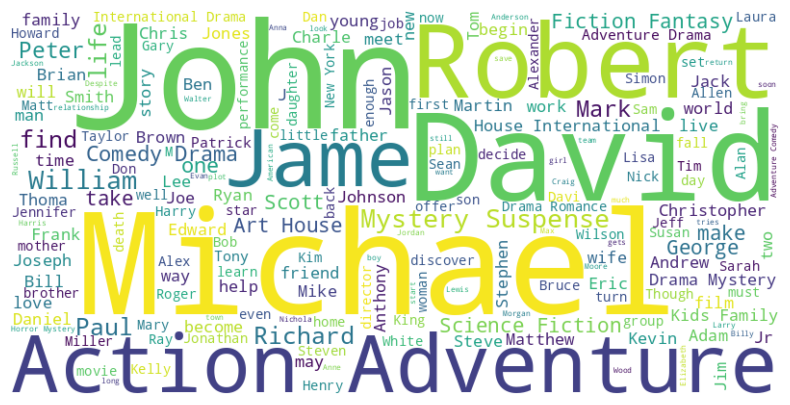

In [116]:
text = " ".join(rtreviewdf['combined_text'])

# # Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [117]:
rtreviewdf["preprocessed_combined_text"] = rtreviewdf["combined_text"].apply(preprocesstext)
rtreviewdf["preprocessed_combined_text"].head()

0    always troubleprone life teenager percy jackso...
1    kate catherine keener husband alex oliver plat...
2    successful middleaged hollywood songwriter fal...
3    following closing argument murder trial 12 mem...
4    1866 professor pierre aronnax paul lukas assis...
Name: preprocessed_combined_text, dtype: object

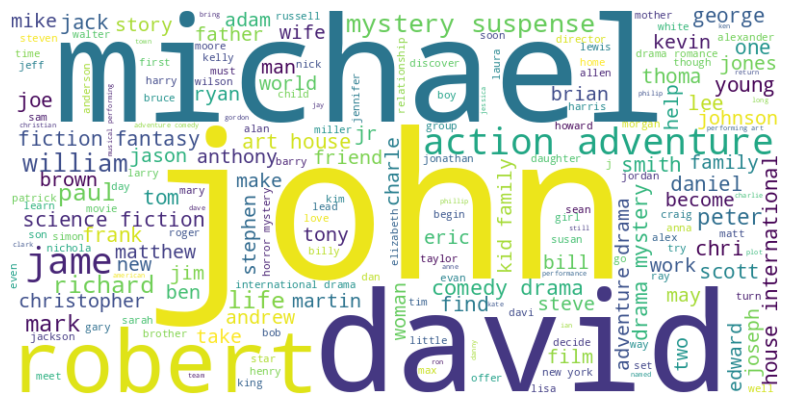

In [118]:
text = " ".join(rtreviewdf['preprocessed_combined_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [119]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizing the preprocessed combined text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(rtreviewdf['preprocessed_combined_text'])
sequences = tokenizer.texts_to_sequences(rtreviewdf['preprocessed_combined_text'])


In [120]:
len(sequences)

8077

In [121]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding sequences to ensure uniform length
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Defining vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

97649

In [122]:
# Defining neural network architecture for embedding
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(max_length, activation='sigmoid')  # Output layer with the same shape as input
])

In [123]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [124]:
# Splitting the data into training and validation sets
X_train, X_val, _, _ = train_test_split(padded_sequences, padded_sequences, test_size=0.2, random_state=42, shuffle=False)


In [125]:
# Training the model
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_val, X_val))


Epoch 1/10
202/202 [==============================] - 78s 370ms/step - loss: 351358528.0000 - val_loss: 556497728.0000
Epoch 2/10
202/202 [==============================] - 63s 310ms/step - loss: 351356736.0000 - val_loss: 556497728.0000
Epoch 3/10
202/202 [==============================] - 64s 319ms/step - loss: 351356800.0000 - val_loss: 556497728.0000
Epoch 4/10
202/202 [==============================] - 66s 327ms/step - loss: 351356704.0000 - val_loss: 556497728.0000
Epoch 5/10
202/202 [==============================] - 65s 321ms/step - loss: 351356832.0000 - val_loss: 556497728.0000
Epoch 6/10
202/202 [==============================] - 62s 306ms/step - loss: 351356672.0000 - val_loss: 556497728.0000
Epoch 7/10
202/202 [==============================] - 67s 330ms/step - loss: 351356736.0000 - val_loss: 556497728.0000
Epoch 8/10
202/202 [==============================] - 62s 307ms/step - loss: 351356800.0000 - val_loss: 556497728.0000
Epoch 9/10
202/202 [============================

In [128]:
# Extracting the embeddings
embeddings_combined_processed_text = model.layers[0].get_weights()[0]

In [130]:
# Saving the embeddings
np.savetxt('/content/drive/MyDrive/embeddings_combined_processed_text_file.csv', embeddings_combined_processed_text, delimiter=',')